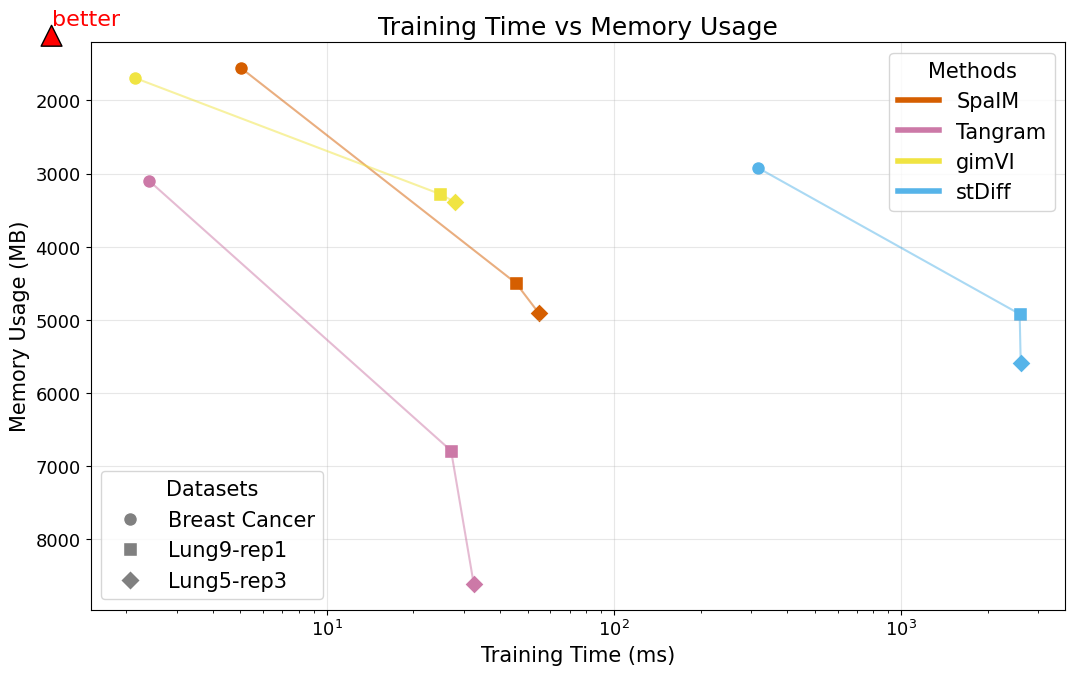

In [1]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['font.size'] = 15 
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13 
plt.rcParams['legend.fontsize'] = 15  


methods = ['SpaIM', 'Tangram', 'gimVI', 'stDiff']
datasets = ['Breast Cancer', 'Lung9-rep1', 'Lung5-rep3']
dataset_markers = ['o', 's', 'D']
dataset_labels = ['32', '24', '22']

colors = ['#d55e00', '#cc79a7', '#f0e442', '#56b4e9'] 

training_times = {
    'SpaIM': [5.023, 45.552, 54.611],
    'Tangram': [2.406, 27.077, 32.462],
    'gimVI': [2.145, 24.712, 27.988],
    'stDiff': [317.74, 2583.43, 2604.98]
}

memory_usages = {
    'SpaIM': [1554.94, 4498.18, 4904.61],
    'Tangram': [3099.22, 6790.86, 8611.53],
    'gimVI': [1690.83, 3277.68, 3390.78],
    'stDiff': [2923.36, 4920.70, 5593.32]
}

plt.figure(figsize=(11, 7))

for i, method in enumerate(methods):
    plt.plot(training_times[method], memory_usages[method], 
             color=colors[i], linestyle='-', alpha=0.5, label='_nolegend_')
    
    for j, dataset in enumerate(datasets):
        plt.scatter(training_times[method][j], memory_usages[method][j],
                   marker=dataset_markers[j], color=colors[i],
                   s=100, edgecolor='white', linewidth=1,
                   label=f'{method} ({dataset_labels[j]})' if i == 0 else f'({dataset_labels[j]})')

from matplotlib.lines import Line2D

method_legend_elements = [Line2D([0], [0], color=colors[i], lw=4, label=methods[i]) 
                         for i in range(len(methods))]

dataset_legend_elements = [Line2D([0], [0], marker=dataset_markers[j], color='gray',
                                label=datasets[j], linestyle='',
                                markersize=10, markeredgecolor='white') 
                         for j in range(len(datasets))]

first_legend = plt.legend(handles=method_legend_elements, title='Methods', loc='upper right')
plt.gca().add_artist(first_legend)
plt.legend(handles=dataset_legend_elements, title='Datasets', loc='lower left')

plt.xlabel('Training Time (ms)')
plt.ylabel('Memory Usage (MB)')
plt.title('Training Time vs Memory Usage')
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.gca().invert_yaxis()


arrowprops = dict(facecolor='red', shrink=0.05, width=20, headwidth=15, headlength=15)

plt.annotate('better', xy=(-0.04, 1.03), xycoords='axes fraction',
             arrowprops=arrowprops,
             fontsize=16, color='red')

# arrowprops = dict(facecolor='red', shrink=0.05, width=2, headwidth=8, headlength=10)
# plt.annotate('better', xy=(0.02, 0.95), xycoords='axes fraction',
#              arrowprops=arrowprops, fontsize=12, color='red')

plt.tight_layout()
plt.savefig('SFig7a_Time_GPU.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()